In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# Handling missing data

In [ ]:
# filling missing value
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [ ]:
df.drop(['Alley','GarageYrBlt','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

<Axes: >

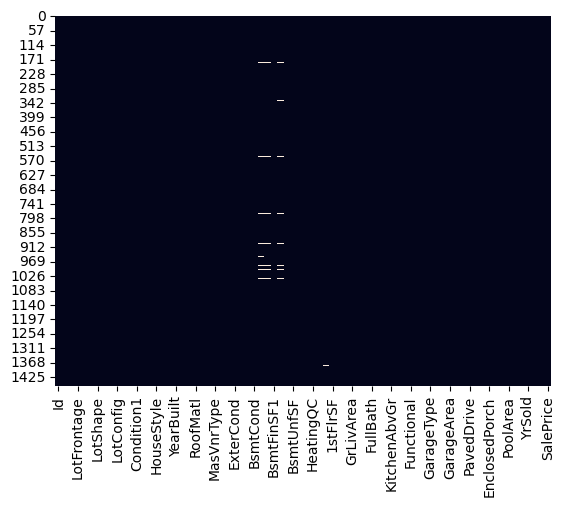

In [ ]:
sns.heatmap(df.isnull(),cbar= False)

In [ ]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<Axes: >

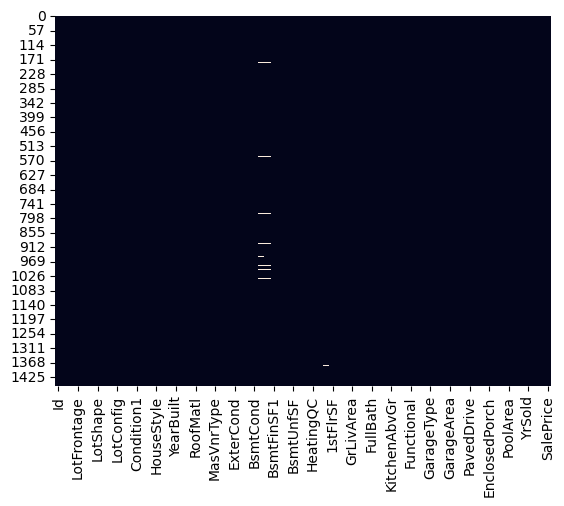

In [ ]:
sns.heatmap(df.isnull(),cbar= False)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1421, 76)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
columns=['MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2','BldgType', 'Condition1', 'HouseStyle', 'SaleType', 'SaleCondition','ExterCond', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

In [ ]:
len(columns)

39

In [ ]:
# handling categorical features

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final = final_df
    i=0

    for fields in multcolumns:
        print(fields)
        df_1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)

        if i==0:
            df_final=df_1.copy()
        else:
            df_final=pd.concat([df_final,df_1],axis=1)

        i=i+1

    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
# combine test data

test_df=pd.read_csv('test.csv')
test_df.shape

(1459, 74)

In [ ]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
# handling missing data in test.csv

In [ ]:
# filling missing value

test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

In [ ]:
test_df.loc[:,test_df.isnull().any()].head()

,MSZoning,LotFrontage,BsmtExposure
0,RH,80.0,No
1,RL,81.0,No
2,RL,74.0,No
3,RL,78.0,No
4,RL,43.0,No


In [ ]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [ ]:
test_df.shape

(1459, 74)

In [ ]:
test_df.to_csv('test.csv',index=False)

In [ ]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
extracted_col = df["Id"]
print(extracted_col)

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1421, dtype: int64


In [ ]:
final_df=pd.concat([df,test_df],axis=0)

In [ ]:
final_df.shape

(2880, 76)

In [ ]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
final_df.shape

(2880, 235)

In [ ]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(2880, 175)

In [ ]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1.0,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,True,True,False,False,False,False,True,False
1,2.0,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,True,True,False,False,False,False,True,False
2,3.0,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,True,True,False,False,False,False,True,False
3,4.0,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,True,False,False,False,False,True,False,False
4,5.0,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
# feature selection (to see the significance)

In [ ]:
# correlation between output columns and all other columns

In [ ]:
final_df[final_df.columns[1:]].corr()['SalePrice'][:]

MSSubClass    -0.084478
LotFrontage    0.335424
LotArea        0.263798
OverallQual    0.788045
OverallCond   -0.095440
                 ...   
BuiltIn        0.235030
CarPort       -0.061047
Detchd        -0.352216
RFn            0.159679
P             -0.094179
Name: SalePrice, Length: 174, dtype: float64

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
print("The important features are :\n" )
dfc = final_df[['Id','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd'
,'YearBuilt','LotArea','SalePrice']]
dfc

The important features are :



,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea,SalePrice
0,1.0,7,1710,2.0,548.0,856.0,856,2,8,2003,8450,208500.0
1,2.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,9600,181500.0
2,3.0,7,1786,2.0,608.0,920.0,920,2,6,2001,11250,223500.0
3,4.0,7,1717,3.0,642.0,756.0,961,1,7,1915,9550,140000.0
4,5.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,14260,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,6,1647,2.0,460.0,953.0,953,2,7,1999,7917,175000.0
1456,1457.0,6,2073,2.0,500.0,1542.0,2073,2,7,1978,13175,210000.0
1457,1458.0,7,2340,1.0,252.0,1152.0,1188,2,9,1941,9042,266500.0
1458,1459.0,5,1078,1.0,240.0,1078.0,1078,1,5,1950,9717,142125.0


<Axes: >

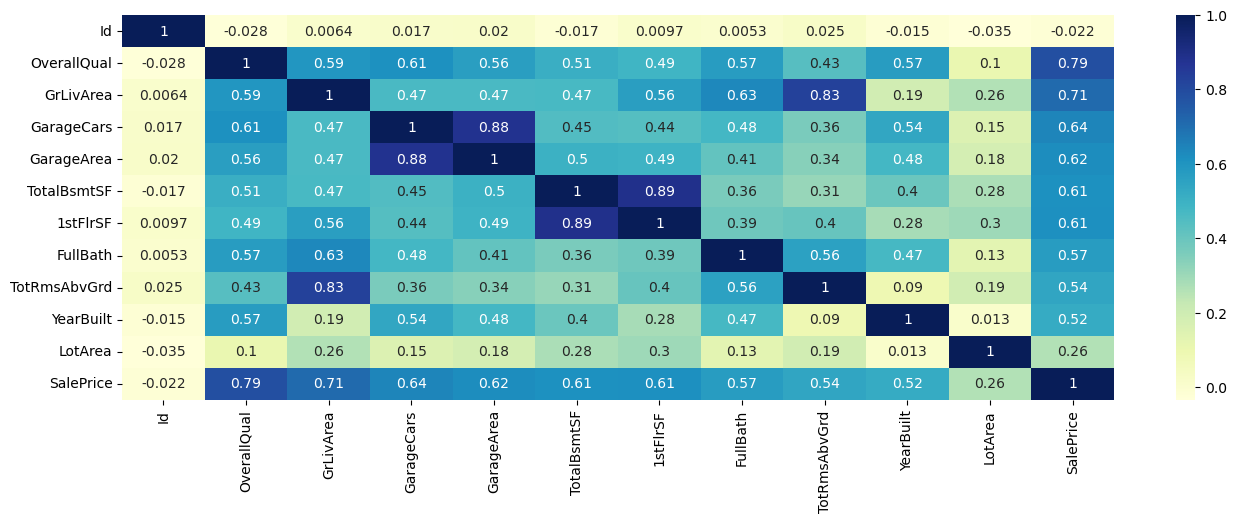

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(dfc.corr(),annot=True,cmap="YlGnBu")

Right Skewed Data: More houses with price between 1 million and 3 million 


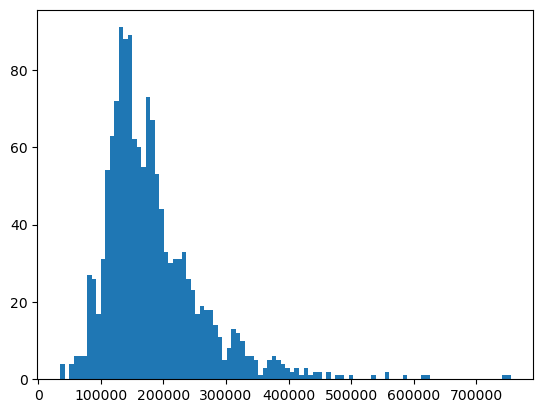

In [ ]:
plt.hist(final_df['SalePrice'],bins=100)
print("Right Skewed Data: More houses with price between 1 million and 3 million ")

In [ ]:
# for outliers
# using box plot

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

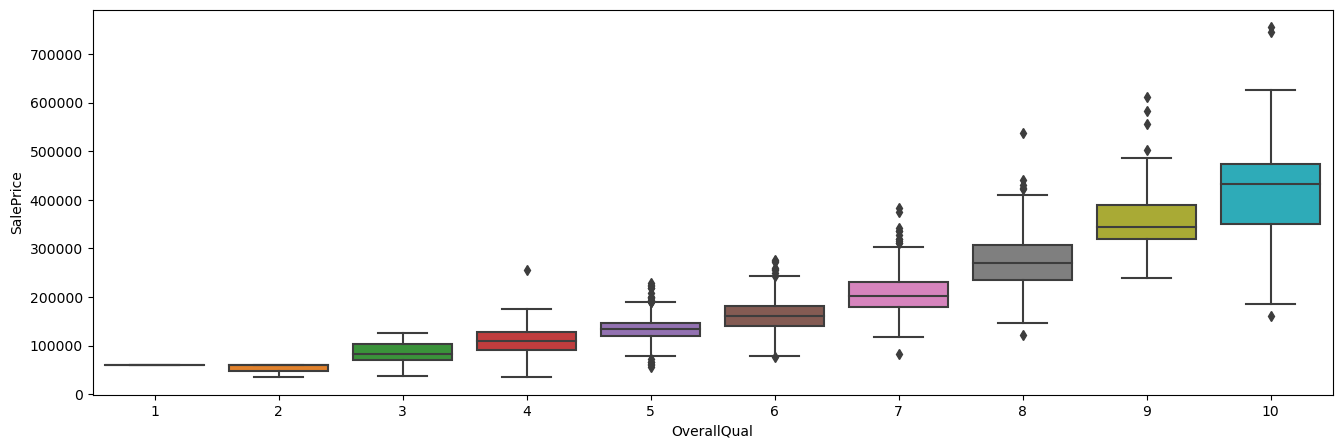

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(x='OverallQual',y='SalePrice',data=dfc)

In [ ]:
print(dfc.isnull().sum())

Id              0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
LotArea         0
SalePrice       0
dtype: int64


In [ ]:
print("No missing values")

No missing values


In [ ]:
# Linear Regression

In [ ]:
#dividing the dataset into independent and dependent variable

X=dfc.iloc[:,:-1]
y=dfc.iloc[:,-1]

In [ ]:
X

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea
0,1.0,7,1710,2.0,548.0,856.0,856,2,8,2003,8450
1,2.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,9600
2,3.0,7,1786,2.0,608.0,920.0,920,2,6,2001,11250
3,4.0,7,1717,3.0,642.0,756.0,961,1,7,1915,9550
4,5.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,14260
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,6,1647,2.0,460.0,953.0,953,2,7,1999,7917
1456,1457.0,6,2073,2.0,500.0,1542.0,2073,2,7,1978,13175
1457,1458.0,7,2340,1.0,252.0,1152.0,1188,2,9,1941,9042
1458,1459.0,5,1078,1.0,240.0,1078.0,1078,1,5,1950,9717


In [ ]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1421, dtype: float64

In [ ]:
# splitting the dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predicting the test set results

y_pred = lin_reg.predict(X_test)

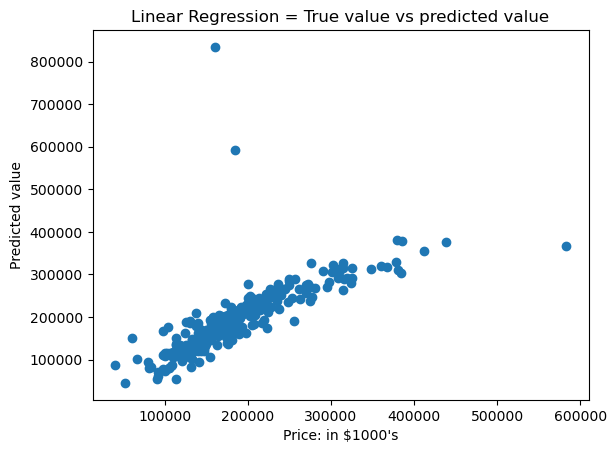

In [ ]:
# Plotting Scatter graph to show the prediction

plt.scatter(y_test, y_pred)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("Linear Regression = True value vs predicted value")
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("New RMSE: ", math.sqrt(mean_squared_error(y_pred, y_test)))

New RMSE:  55261.42148701343


In [ ]:
y_pred.size

285

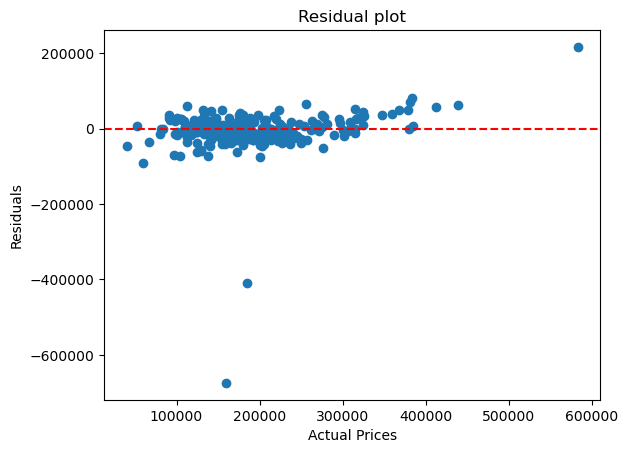

In [ ]:

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()